In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
def f(x):
    return 3*x**2 - 4*x +5


In [4]:
f(3.2)

22.920000000000005

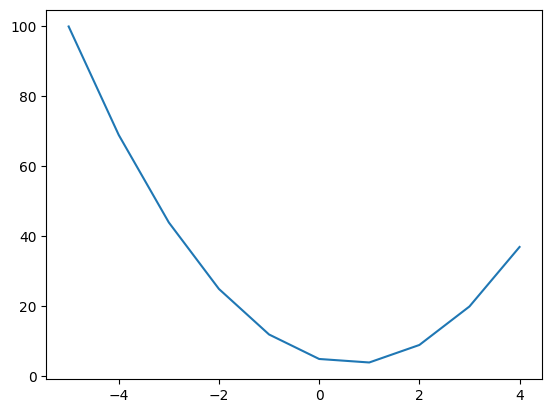

In [13]:
xs=np.arange(-5,5)
ys=f(xs)
plt.plot(xs,ys)

In [ ]:
h=0.00001
x=0.67
(f(x+h) - f(x))/h
# sdfdsf

0.020030000014159555

In [26]:
#lesss get more complex
a=2.0
b=-3.0
c=10.0
d=a*b+c
print(d)

4.0


In [27]:
h=0.0001
#inputs
a=2.0
b=-3.0
c=10.0
d1=a*b+c
a+=h
d2=a*b+c

print('d1',d1)
print('d2',d2)

print ('slope',(d2-d1)/h)


d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [48]:
class Value:
    def __init__(self, data, _children=()):
        self.data=data;
        self.prev=set(_children)
    def __repr__ (self):
        return f"Value(data={self.data}"
    def __add__ (self, other):
        return Value(self.data + other.data, (self, other),'+')
    def __mul__ (self, other):
        return Value(self.data * other.data,(self, other),'*')
        

In [68]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L



Value(data=-8.0)

In [73]:
# from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node t o it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)


    return dot